In [1]:
%matplotlib inline
import obspy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates


from hydrophone_data_processing import load, preprocessing, tempmatch
# from multitaper.multitaper import Multitaper
# from spectrum import *
import spectrum

def zero_pad(data, N, k):
    data_length = N*k
    extra_zeros = np.zeros(int(data_length - data.shape[0]))
    data = np.append(data, extra_zeros)
    return data

def get_power_freq(N, NW, k, data):
    data = zero_pad(data, N, k)
    data = np.reshape(data, (k, N))
    w, eigens = spectrum.dpss(N, NW, k)
    sk, weights, eigenvalues = spectrum.pmtm(data, e=eigens, v=w, method='eigen')
    power = 10*np.log10(np.abs(np.mean(sk * sk.conj(), axis=0)))
    Tlength = 1000/(data.shape[0] * data.shape[1])
    freq = np.ones(power.shape) * Tlength
    freq = freq.cumsum()
    return freq, power

In [2]:
paths = ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.138']

day138 = load.import_corrected_data_for_single_day(paths=paths)

In [6]:
detectfiles = '/media/sda/data/borehole/detections/*.csv'
bubbles = load.import_detections(detectfiles)
bubbles = bubbles[bubbles.similarity>0.90]

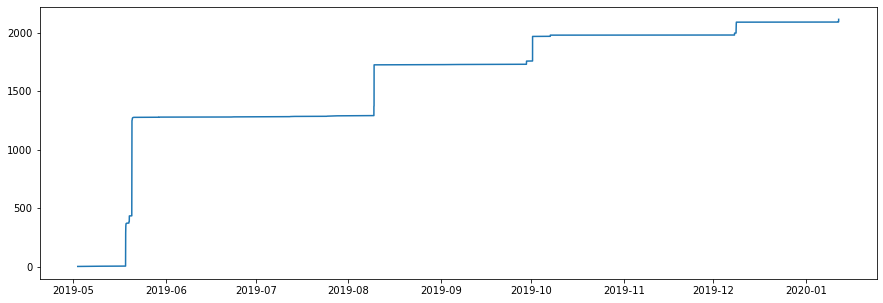

In [7]:
t = bubbles.time
y = np.ones_like(t).cumsum()
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(t, y)

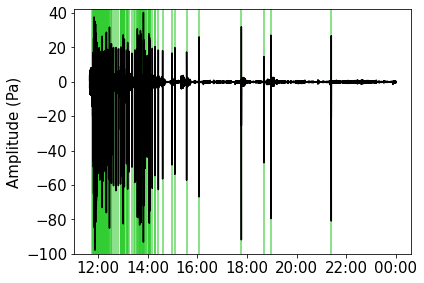

In [8]:
###################
fig, ax = plt.subplots()

data = bubbles[bubbles.time.between('2019-05-18', '2019-05-19')].copy()

x = data.time
y = np.ones_like(x)*500
ax.plot([x, x], [-y, y], color='limegreen', alpha=0.75)

h1 = day138[0].slice(starttime=obspy.UTCDateTime('2019-05-18T11:40:00'))
ax.plot(h1.times('matplotlib'), h1.data, color='black')

ax.set_ylim(-100, 42)
ax.set_ylabel('Amplitude (Pa)', fontsize=15)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

bbox = dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5')
# ax[1].text(s='March 18, 2019', fontsize=20, x=h1.times('matplotlib').min(), y=-90, bbox=bbox)

bbox = dict(facecolor='none', edgecolor='black', boxstyle='square,pad=0.5')
# ax[0].text(s='A', fontsize=20, x=temp[-1].times('matplotlib').max()+2.25e-6, y=-70, bbox=bbox)
# fig.text(s='A', fontsize=30, x=0.9, y=0.4, bbox=bbox)
# fig.text(s='B', fontsize=30, x=0.9, y=0.075, bbox=bbox)

fig.tight_layout()

In [ ]:
# def get_bubble_waveform_h1(starttime):
def get_bubble_waveform(starttime):
    starttime = obspy.UTCDateTime(starttime)
    return day138.slice(starttime=starttime-0.05, endtime=starttime+0.1).copy()


b1 = np.vstack(get_bubble_waveform(starttime=b)[0].data)
np.savetxt('day138bubbledata.csv'
           , X=np.hstack([np.vstack(get_bubble_waveform(starttime=t)[0].data) for t in bubbles.time])
          , delimiter=',')

In [61]:
paths = sorted(load.create_datafiles(hole='b'))

In [14]:
from datetime import date

In [19]:
date(2009, 9, 27).timetuple().tm_yday

270

In [40]:
paths[0]

['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.121',
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.121',
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.121',
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.121',
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.121',
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.121']

In [39]:
bubbles.time.iloc[0].date().timetuple().tm_yday

122

In [49]:
# b1 = np.vstack(get_bubble_waveform(starttime=b)[0].data)
# np.savetxt('day138bubbledata.csv'
#            , X=np.hstack([np.vstack(get_bubble_waveform(starttime=t)[0].data) for t in bubbles.time])
#           , delimiter=',')

bubble_streams = []

for b in bubbles.time:
    starttime = obspy.UTCDateTime(b)
    julian_day = b.date().timetuple().tm_yday
    paths = ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.{}'.format(julian_day),
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.{}'.format(julian_day),
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.{}'.format(julian_day),
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.{}'.format(julian_day),
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.{}'.format(julian_day),
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.{}'.format(julian_day)]
    stream = load.import_corrected_data_for_single_day(paths=paths)
    stream = stream.slice(starttime=starttime-0.05, endtime=starttime+0.1).copy()
    data = np.vstack(stream[0].data.copy())
    bubble_streams.append(data)
    del starttime, julian_day, paths, stream, data

KeyboardInterrupt: 

In [71]:
def do(b):
    starttime = obspy.UTCDateTime(b)
    julian_day = b.date().timetuple().tm_yday
    if julian_day < 100:
        julian_day = '0' + str(julian_day)
        year = '2020'
    else:
        year = '2019'
    paths = ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.{y}.{d}'.format(y=year,d=julian_day),
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.{y}.{d}'.format(y=year, d=julian_day),
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.{y}.{d}'.format(y=year, d=julian_day),
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.{y}.{d}'.format(y=year, d=julian_day),
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.{y}.{d}'.format(y=year, d=julian_day),
 '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.{y}.{d}'.format(y=year, d=julian_day)]
    stream = load.import_corrected_data_for_single_day(paths=paths)
    stream = stream.slice(starttime=starttime-0.05, endtime=starttime+0.1).copy()
    data = np.vstack(stream[0].data.copy())
    del starttime, julian_day, paths, stream
    return data

In [73]:
# do(b=bubbles.time.iloc[-1])

In [53]:
%timeit do(b=bubbles.time.iloc[0])

4.07 s ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [74]:
from multiprocessing import Pool

pool = Pool()
bubble_streams = pool.map(do, bubbles.time)
pool.close()

In [75]:
data_for_rob = np.hstack(bubble_streams)
 # np.savetxt('day138bubbledata.csv'
#            , X=np.hstack([np.vstack(get_bubble_waveform(starttime=t)[0].data) for t in bubbles.time])
#           , delimiter=',')

In [90]:
np.savetxt('allbubblesh1.csv', X=data_for_rob, delimiter=',')

''

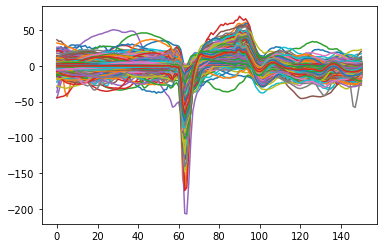

In [79]:
plt.plot(data_for_rob)
''

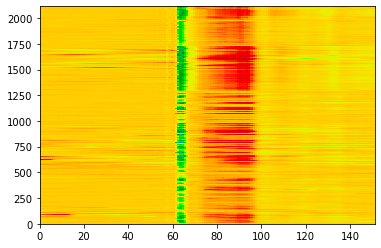

In [89]:
plt.pcolormesh(data_for_rob.T, cmap='nipy_spectral')

In [47]:
x = np.vstack([1, 2, 3])
y = np.vstack([2,3,4])

np.hstack([x, y])

array([[1, 2],
       [2, 3],
       [3, 4]])